### Importing libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

### Loading the dataset

In [43]:
dict_df = pd.read_csv("./dataset/data-dictionary.csv")
df = pd.read_csv("./dataset/Country-data.csv")

In [44]:
dict_df

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [45]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### EDA

In [46]:
df.shape

(167, 10)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [48]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [49]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [50]:
print("No of countries present: ",df['country'].nunique())

No of countries present:  167


In [51]:
# Select relevant features for clustering
selected_features = ['child_mort', 'exports', 'health', 'income', 'life_expec', 'total_fer', 'gdpp']
X = df[selected_features]

# Choose the number of clusters
num_clusters = 4  # You can adjust this based on your interpretation

In [52]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df['cluster'] = kmeans.fit_predict(X)


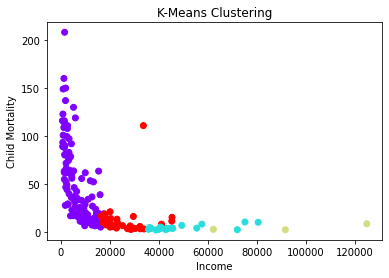

                 country  cluster      risk_level
0            Afghanistan        0        Low risk
1                Albania        0        Low risk
2                Algeria        0        Low risk
3                 Angola        0        Low risk
4    Antigua and Barbuda        3  Very high risk
..                   ...      ...             ...
162              Vanuatu        0        Low risk
163            Venezuela        3  Very high risk
164              Vietnam        0        Low risk
165                Yemen        0        Low risk
166               Zambia        0        Low risk

[167 rows x 3 columns]


In [54]:
# Map cluster labels to custom risk labels
risk_labels = {
    0: 'Low risk',
    1: 'Medium risk',
    2: 'High risk',
    3: 'Very high risk'
}
df['risk_level'] = df['cluster'].map(risk_labels)

# Visualize the clusters (2D example with two features)
plt.scatter(df['income'], df['child_mort'], c=df['cluster'], cmap='rainbow')
plt.xlabel('Income')
plt.ylabel('Child Mortality')
plt.title('K-Means Clustering')
plt.show()

# View the clustered data and custom risk labels
print(df[['country', 'cluster', 'risk_level']])

In [55]:
display(df[df['cluster'] == 0])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,risk_level
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,Low risk
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Low risk
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Low risk
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,Low risk
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0,Low risk
...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0,Low risk
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,Low risk
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,Low risk
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,Low risk


In [56]:
display(df[df['cluster'] == 1])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,risk_level
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1,Medium risk
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1,Medium risk
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1,Medium risk
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1,Medium risk
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1,Medium risk
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1,Medium risk
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1,Medium risk
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1,Medium risk
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,1,Medium risk
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,1,Medium risk


In [57]:
display(df[df['cluster'] == 2])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,risk_level
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000,2,High risk
114,Norway,3.2,39.7,9.48,28.5,62300,5.95,81.0,1.95,87800,2,High risk
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300,2,High risk


In [58]:
display(df[df['cluster'] == 3])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,risk_level
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,3,Very high risk
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,3,Very high risk
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,3,Very high risk
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,3,Very high risk
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,3,Very high risk
33,Chile,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12900,3,Very high risk
41,Croatia,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13500,3,Very high risk
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,3,Very high risk
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,3,Very high risk
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,3,Very high risk


In [59]:
cluster_counts = df['cluster'].value_counts()

# Print the counts
print(cluster_counts)

0    108
3     35
1     21
2      3
Name: cluster, dtype: int64


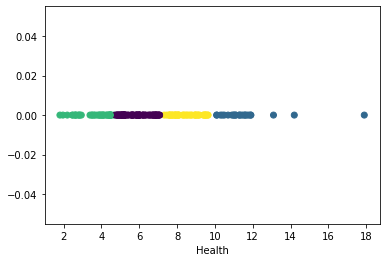

                 country  health  health_cluster
0            Afghanistan    7.58               3
1                Albania    6.55               0
2                Algeria    4.17               2
3                 Angola    2.85               2
4    Antigua and Barbuda    6.03               0
..                   ...     ...             ...
162              Vanuatu    5.25               0
163            Venezuela    4.91               0
164              Vietnam    6.84               0
165                Yemen    5.18               0
166               Zambia    5.89               0

[167 rows x 3 columns]


In [35]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
# Assuming df contains your data
# df = pd.read_csv("your_data.csv")

# Select the "health" column as your feature
X = df[['health']]

# Choose the number of clusters (you can adjust this)
num_clusters = 4

# Create a K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit the model to your data
kmeans.fit(X)

# Add cluster labels to your DataFrame
df['health_cluster'] = kmeans.labels_

# Visualize the clusters (optional)
plt.scatter(X['health'], [0] * len(X), c=kmeans.labels_)
plt.xlabel('Health')
plt.show()

# Display the resulting DataFrame with cluster labels
print(df[['country', 'health', 'health_cluster']])

In [36]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,health_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [37]:
cluster_counts = df['health_cluster'].value_counts()

# Print the counts
print(cluster_counts)

0    65
3    41
2    37
1    24
Name: health_cluster, dtype: int64


In [39]:
display(df[df['health_cluster']==0])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,health_cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20700,0
14,Belarus,5.5,51.4,5.61,64.5,16200,15.10,70.4,1.49,6030,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [40]:
display(df[df['health_cluster']==1])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,health_cluster
8,Austria,4.3,51.30,11.0,47.8,43200,0.873,80.5,1.44,46900,1
15,Belgium,4.5,76.40,10.7,74.7,41100,1.880,80.0,1.86,44400,1
20,Bosnia and Herzegovina,6.9,29.70,11.1,51.3,9720,1.400,76.8,1.31,4610,1
26,Burundi,93.6,8.92,11.6,39.2,764,12.300,57.7,6.26,231,1
29,Canada,5.6,29.10,11.3,31.0,40700,2.870,81.3,1.63,47400,1
39,Costa Rica,10.2,33.20,10.9,35.0,13000,6.570,80.4,1.92,8200,1
44,Denmark,4.1,50.50,11.4,43.6,44000,3.220,79.5,1.87,58000,1
54,France,4.2,26.80,11.9,28.1,36900,1.050,81.4,2.03,40600,1
57,Georgia,16.5,35.00,10.1,52.8,6730,8.550,72.8,1.92,2960,1
58,Germany,4.2,42.30,11.6,37.1,40400,0.758,80.1,1.39,41800,1


In [41]:
display(df[df['health_cluster']==3])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,health_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,3
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,3
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,3
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,3
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,3
22,Brazil,19.8,10.7,9.01,11.8,14500,8.410,74.2,1.80,11200,3
33,Chile,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12900,3
35,Colombia,18.6,15.9,7.59,17.8,10900,3.860,76.4,2.01,6250,3
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,3
